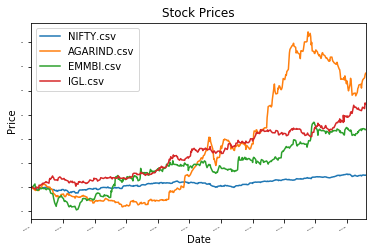

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt

def get_path(sym, base_dir = "data"):
    cwd = os.getcwd()
    path = os.path.join(cwd, base_dir, sym)
    return path


def get_data(files, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    dfstocks = pd.DataFrame(index=dates)
    if 'NIFTY.csv' not in files:  # add SPY for reference, if absent
        files.insert(0, 'NIFTY.csv')

    for f in files:
        # TODO: Read and join data for each symbol
        files_path = get_path(f)
        df_temp = pd.read_csv(files_path, index_col = "Date", 
                           parse_dates = True,
                           usecols = ['Date', 'Close Price'])
        df_temp = df_temp.rename(columns = {'Close Price' : f})
        dfstocks = dfstocks.join(df_temp, how = 'inner')

    return dfstocks


def write_data(data, outfile):
    base_dir = "data"
    cwd = os.getcwd()
    path = os.path.join(cwd, base_dir, outfile)
    data.to_csv(path)


def normalize_data(df):
    return df/df.iloc[0,:]


def plot_data(data, title = "Stock Prices"):
    ax = data.plot(title = title, fontsize = 2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def prepare_data():
    
    files = ["NIFTY.csv", "AGARIND.csv", "EMMBI.csv", "IGL.csv"]
    
    start_date = '12/1/2015'
    end_date = '9/7/2017'
    dates = pd.date_range(start_date, end_date)
    
    #dfstocks = pd.DataFrame(index=dates)
    #dfnifty = pd.read_csv(files_path, index_col = "Date", 
    #                       parse_dates = True,
    #                       usecols = ['Date', 'Close Price'])
    #dfnifty = dfnifty.rename(columns = {'Close Price' : 'NIFTY'})
    #dfstocks = dfstocks.join(dfnifty, how = 'right')
    #for f in files[1:]:
    #    files_path = get_path(f)
    #    df_temp = pd.read_csv(files_path, index_col = "Date", 
    #                       parse_dates = True,
    #                       usecols = ['Date', 'Close Price'])
    #    df_temp = df_temp.rename(columns = {'Close Price' : f})
    #    dfstocks = dfstocks.join(df_temp, how = 'inner')
    
    dfstocks = get_data(files, dates)
    write_data(dfstocks, 'ClosePriceAll.csv')
    dfstocks_norm = normalize_data(dfstocks)
    plot_data(dfstocks_norm)

if __name__ == "__main__":
    prepare_data()